In [ ]:
!pip install icedata
!pip install icevision[all]




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 14.9 MB/s 
     |████████████████████████████████| 87 kB 8.0 MB/s 
     |████████████████████████████████| 81 kB 10.5 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 798 kB 45.2 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:38tcmalloc: large alloc 1147494400 bytes == 0x3abbc000 @  0x7f019af52615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 1.4 kB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 3.1 MB 41.6 MB/s 
     |███████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset.git
%cd PlantDoc-Object-Detection-Dataset/

fatal: destination path 'PlantDoc-Object-Detection-Dataset' already exists and is not an empty directory.
/content/PlantDoc-Object-Detection-Dataset


In [ ]:
import pandas as pd
from icevision.all import *

annot=pd.read_csv("/content/PlantDoc-Object-Detection-Dataset/train_labels.csv")
annot.rename(columns={'class':'label'},inplace=True)
annot.sample(5)
annot.info()

_CLASSES=annot["label"].unique().tolist()
_CLASSES

class_map = ClassMap(_CLASSES)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  8469 non-null   object
 1   width     8469 non-null   int64 
 2   height    8469 non-null   int64 
 3   label     8469 non-null   object
 4   xmin      8469 non-null   int64 
 5   ymin      8469 non-null   int64 
 6   xmax      8469 non-null   int64 
 7   ymax      8469 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 529.4+ KB


In [ ]:
Path('./TRAIN').ls()
data_dir=Path('./TRAIN')

parser=parsers.voc(annotations_dir=data_dir,images_dir=data_dir)

train_records, valid_records =parser.parse()
template_record =ObjectDetectionRecord()
Parser.generate_template(template_record)

WARNING  - This function will be deprecated, instantiate the concrete classes instead: `VOCBBoxParser`, `VOCMaskParser` | icevision.parsers.voc_parser:voc:18


  0%|          | 0/2356 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/2355 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 2f73110f80014a25a53f9551c94bf164.png) - Clipping bbox xmax from 525 to image width 0 (Before: <BBox (xmin:58, ymin:92, xmax:525, ymax:386)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 2f73110f80014a25a53f9551c94bf164.png) - Clipping bbox ymax from 386 to image height 0 (Before: <BBox (xmin:58, ymin:92, xmax:0, ymax:386)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-FAIL - (record_id: 2f73110f80014a25a53f9551c94bf164.png) - Cannot auto-fix coordinates: <BBox (xmin:58, ymin:92, xmax:0, ymax:0)>
	x_min:58 is greater than or equal to x_max:0
	y_min:92 is greater than or equal to y_max:0 | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-REPORT - (record_id: 2f73110f80014a25a53f9551c94bf164.png) Removed annotation with index: 0, for more info check the AUTOFIX-FAIL messages above | icevision.core.record:autofix:50
WARNING  - (record_id: NCLB) - 🚫 Record could not be autofixed and will be removed because: File 'TRAIN

class MyParser(Parser):
    def __init__(self, template_record):
        super().__init__(template_record=template_record)
    def __iter__(self) -> Any:
    def __len__(self) -> int:
    def record_id(self, o: Any) -> Hashable:
    def parse_fields(self, o: Any, record: BaseRecord, is_new: bool):
        record.set_filepath(<Union[str, Path]>)
        record.set_img_size(<ImgSize>)
        record.detection.set_class_map(<ClassMap>)
        record.detection.add_labels(<Sequence[Hashable]>)
        record.detection.add_bboxes(<Sequence[BBox]>)


In [ ]:
data_dir =Path(".")
from torch.utils import data
class PlantDocParser(Parser):
  def __init__(self,template_record,data_dir):
    super().__init__(template_record=template_record)

    self.data_dir =data_dir
    self.df=pd.read_csv(data_dir/"train_labels.csv")
    self.df.rename(columns={'class':'label'},inplace=True)
    self.class_map=ClassMap(list(self.df['label'].unique()))



  def __iter__(self)-> Any:
      for o in self.df.itertuples():
        yield o
      

  def __len(self)->int:
      return len(self.df)

  def record_id(self,o)-> Hashable:
      return o.filename

  def parse_fields(self,o,record,is_new):
      if is_new:
        filepath=self.data_dir/'TRAIN'/o.filename
        record.set_filepath(filepath)
        if filepath.exists():
          image_size=get_img_size(filepath)
          record.set_img_size(image_size)
        record.detection.set_class_map(self.class_map)

      record.detection.add_bboxes([BBox.from_xyxy(o.xmin,o.ymin,o.xmax,o.ymax)])
      record.detection.add_labels([o.label])

In [ ]:
parser_csv=PlantDocParser(template_record,data_dir)

train_records_csv, valid_records_csv=parser_csv.parse()
presize = 512

image_size = 384
train_tfms = tfms.A.Adapter ([*tfms.A.aug_tfms (size=image_size, presize=presize), tfms.A.Normalize ()])
valid_tfms = tfms.A.Adapter ([*tfms.A.resize_and_pad(size=image_size), tfms.A.Normalize ()])

train_ds = Dataset (train_records_csv, train_tfms)
valid_ds = Dataset (valid_records_csv, valid_tfms)

0it [00:00, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/2345 [00:00<?, ?it/s]

WARNING  - (record_id: NCLB.jpg) - 🚫 Record could not be autofixed and will be removed because: File 'TRAIN/NCLB.jpg' does not exist | icevision.core.record:autofix_records:104
WARNING  - (record_id: early-blight-1.jpg) - 🚫 Record could not be autofixed and will be removed because: File 'TRAIN/early-blight-1.jpg' does not exist | icevision.core.record:autofix_records:104
AUTOFIX-SUCCESS - (record_id: LB_potato_leaf_topside.jpg) - Clipping bbox xmax from 2354 to image width 2000 (Before: <BBox (xmin:738, ymin:610, xmax:2354, ymax:1679)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: NoCornLeafBlight13b.jpg) - Clipping bbox xmax from 2409 to image width 1944 (Before: <BBox (xmin:321, ymin:731, xmax:2409, ymax:1613)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: NoCornLeafBlight13b.jpg) - Clipping bbox xmax from 1961 to image width 1944 (Before: <BBox (xmin:221, ymin:117, xmax:1961, ymax:879)>) | icevision.utils.logger_utils:aut

**Prediction Method1**

In [ ]:


from icedata.utils import load_model_weights_from_url
from icevision.all import *


extra_args = {}
image_size=384
model_type=models.ultralytics.yolov5
backbone = model_type.backbones.small
#The yolov5 model requires an img size parameter
extra_args['img_size'] = image_size
            
model = model_type.model (backbone=backbone (pretrained=True), num_classes=len (parser_csv.class_map), **extra_args)

#model = model_type.model(backbone=backbone, num_classes=len(class_map))
#WEIGHTS_URL = 'https://github.com/airctic/model_zoo/releases/download/m3/pets_faster_resnetfpn50.zip'
#load_model_weights_from_url(model, WEIGHTS_URL, map_location=torch.device('cpu'))
state_dict = torch.load('/content/drive/MyDrive/Model/30_epoch_YOLO.pth', map_location=torch.device('cpu')) 
## nb: "map_location"  will put the model on cpu, optionally move to gpu if necessary by replacing 'cpu' by 'cuda'

#load the model
model.load_state_dict(state_dict)

infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=384), tfms.A.Normalize()])
import PIL, requests
def image_from_url(url):
    img = PIL.Image.open(url)
    return np.array(img)

image_url = "/content/drive/MyDrive/Dataset/Test_Images/tomatoMultiple_Yellow&septora.jpeg"
img = image_from_url(image_url)
show_img(img);

infer_ds = Dataset.from_images([img], infer_tfms)
preds = model_type.predict(model, infer_ds, keep_images=True)
show_preds(preds=preds)


  0%|          | 0.00/14.1M [00:00<?, ?B/s]

05/30/2022 05:21:25 - INFO - yolov5.models.yolo -   Overriding model.yaml nc=80 with nc=29
05/30/2022 05:21:25 - INFO - yolov5.models.yolo -   
                 from  n    params  module                                  arguments                     
05/30/2022 05:21:25 - INFO - yolov5.models.yolo -     0                -1  1      3520  yolov5.models.common.Conv               [3, 32, 6, 2, 2]              
05/30/2022 05:21:25 - INFO - yolov5.models.yolo -     1                -1  1     18560  yolov5.models.common.Conv               [32, 64, 3, 2]                
05/30/2022 05:21:25 - INFO - yolov5.models.yolo -     2                -1  1     18816  yolov5.models.common.C3                 [64, 64, 1]                   
05/30/2022 05:21:25 - INFO - yolov5.models.yolo -     3                -1  1     73984  yolov5.models.common.Conv               [64, 128, 3, 2]               
05/30/2022 05:21:25 - INFO - yolov5.models.yolo -     4                -1  2    115712  yolov5.models.common.C3  

05/30/2022 05:21:25 - INFO - yolov5.models.yolo -    20                -1  1    296448  yolov5.models.common.C3                 [256, 256, 1, False]          
05/30/2022 05:21:25 - INFO - yolov5.models.yolo -    21                -1  1    590336  yolov5.models.common.Conv               [256, 256, 3, 2]              
05/30/2022 05:21:25 - INFO - yolov5.models.yolo -    22          [-1, 10]  1         0  yolov5.models.common.Concat             [1]                           
05/30/2022 05:21:25 - INFO - yolov5.models.yolo -    23                -1  1   1182720  yolov5.models.common.C3                 [512, 512, 1, False]          
05/30/2022 05:21:25 - INFO - yolov5.models.yolo -    24      [17, 20, 23]  1     91698  yolov5.models.yolo.Detect               [29, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [128, 256, 512]]
05/30/2022 05:21:25 - INFO - yolov5.utils.torch_utils -   Model Summary: 270 layers, 7097842 parameters, 7097842 gradients
05/30

RuntimeError: ignored

**Prediction Method 2**

In [ ]:
!pip install mmcv


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 537 kB 8.5 MB/s 
     |████████████████████████████████| 190 kB 29.3 MB/s 
  Created wheel for mmcv: filename=mmcv-1.5.1-py2.py3-none-any.whl size=817971 sha256=91375522c72d626cee089e94b3abfbf274e07f2ba162d71906cbd79fcbeb58ca
  Stored in directory: /root/.cache/pip/wheels/7e/13/34/79ae316926b309574ce9b81376dd860dea766bcaa7c68d85fb
Successfully built mmcv


In [ ]:
from icevision.all import *
from mmcv.runner import (
    load_checkpoint,
    save_checkpoint,
    _load_checkpoint,
    load_state_dict,
)

checkpoint_path = '/content/drive/MyDrive/Model/30_epoch_YOLO.pth'

05/30/2022 05:21:42 - INFO - root -   Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
05/30/2022 05:21:43 - INFO - root -   Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [ ]:
def model_from_checkpoint(
    filename: Union[Path, str],
    model_name=None,
    backbone_name=None,
    classes=None,
    is_coco=False,
    img_size=None,
    map_location=None,
    strict=False,
    revise_keys=[
        (r"^module\.", ""),
    ],
    eval_mode=True,
    logger=None,
):
    """load checkpoint through URL scheme path.
    Args:
        filename (str): checkpoint file name with given prefix
        map_location (str, optional): Same as :func:`torch.load`.
            Default: None
    Returns:
        dict or OrderedDict: The loaded checkpoint.
    """

    if isinstance(filename, Path):
        filename = str(filename)

    checkpoint = _load_checkpoint(
        filename=filename, map_location=map_location, logger=logger
    )

    if is_coco and classes:
        err_msg = "`is_coco` cannot be set to True if `classes` is passed and `not None`. `classes` has priority. `is_coco` will be ignored."
        if logger is not None:
            logger.warning(err_msg)
        else:
            print(err_msg)

    if classes is None:
        if is_coco:
            classes = _CLASSES
        else:
            classes = checkpoint["meta"].get("classes", None)

    class_map = None
    if classes:
        class_map = ClassMap(classes)
        num_classes = len(class_map)

    if img_size is None:
        img_size = checkpoint["meta"].get("img_size", None)

    if model_name is None:
        model_name = checkpoint["meta"].get("model_name", None)

    model_type = None
    if model_name:
        model = model_name.split(".")
        # If model_name contains three or more components, the library and model are the second to last and last components, respectively (e.g. models.mmdet.retinanet)
        if len(model) >= 3:
            model_type = getattr(getattr(models, model[-2]), model[-1])
        # If model_name follows the default convention, the library and model are the first and second components, respectively (e.g. mmdet.retinanet)
        else:
            model_type = getattr(getattr(models, model[0]), model[1])

    if backbone_name is None:
        backbone_name = checkpoint["meta"].get("backbone_name", None)
    if model_type and backbone_name:
        backbone = getattr(model_type.backbones, backbone_name)

    extra_args = {}
    if img_size is None:
        img_size = checkpoint["meta"].get("img_size", None)

    models_with_img_size = ("yolov5", "efficientdet")
    # if 'efficientdet' in model_name:
    if (model_name) and (any(m in model_name for m in models_with_img_size)):
        extra_args["img_size"] = img_size

    # Instantiate model
    if model_type and backbone:
        model = model_type.model(
            backbone=backbone(pretrained=False), num_classes=num_classes, **extra_args
        )
    else:
        model = None

    # OrderedDict is a subclass of dict
    if not isinstance(checkpoint, dict):
        raise RuntimeError(f"No state_dict found in checkpoint file {filename}")
    # get state_dict from checkpoint
    if "state_dict" in checkpoint:
        state_dict = checkpoint["state_dict"]
    else:
        state_dict = checkpoint
    # strip prefix of state_dict
    for p, r in revise_keys:
        state_dict = {re.sub(p, r, k): v for k, v in state_dict.items()}

    # load state_dict
    if model:
        load_state_dict(model, state_dict, strict, logger)
    if eval_mode:
        model.eval()

    checkpoint_and_model = {
        "model": model,
        "model_type": model_type,
        "backbone": backbone,
        "class_map": class_map,
        "img_size": img_size,
        "checkpoint": checkpoint,
    }
    return checkpoint_and_model
    # return model, model_type, backbone, class_map, img_size, checkpoint


checkpoint_and_model = model_from_checkpoint(checkpoint_path)

05/30/2022 05:21:46 - INFO - yolov5.models.yolo -   Overriding model.yaml nc=80 with nc=29
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -   
                 from  n    params  module                                  arguments                     
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -     0                -1  1      3520  yolov5.models.common.Conv               [3, 32, 6, 2, 2]              
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -     1                -1  1     18560  yolov5.models.common.Conv               [32, 64, 3, 2]                
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -     2                -1  1     18816  yolov5.models.common.C3                 [64, 64, 1]                   
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -     3                -1  1     73984  yolov5.models.common.Conv               [64, 128, 3, 2]               
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -     4                -1  2    115712  yolov5.models.common.C3  

load checkpoint from local path: /content/drive/MyDrive/FYP/Model/30_epoch_YOLO.pth


05/30/2022 05:21:46 - INFO - yolov5.models.yolo -    14                -1  1     33024  yolov5.models.common.Conv               [256, 128, 1, 1]              
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -    15                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -    16           [-1, 4]  1         0  yolov5.models.common.Concat             [1]                           
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -    17                -1  1     90880  yolov5.models.common.C3                 [256, 128, 1, False]          
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -    18                -1  1    147712  yolov5.models.common.Conv               [128, 128, 3, 2]              
05/30/2022 05:21:46 - INFO - yolov5.models.yolo -    19          [-1, 14]  1         0  yolov5.models.common.Concat             [1]                           
05/30/2022 05:21:46 - INFO - yolov5.models.yol

In [ ]:
# Just logging the info
model_type = checkpoint_and_model["model_type"]
backbone = checkpoint_and_model["backbone"]
class_map = checkpoint_and_model["class_map"]
img_size = checkpoint_and_model["img_size"]
model_type, backbone, class_map, img_size

(<module 'icevision.models.ultralytics.yolov5' from '/usr/local/lib/python3.7/dist-packages/icevision/models/ultralytics/yolov5/__init__.py'>,
 <ClassMap: {'background': 0, 'Cherry leaf': 1, 'Peach leaf': 2, 'Corn leaf blight': 3, 'Apple rust leaf': 4, 'Potato leaf late blight': 5, 'Strawberry leaf': 6, 'Corn rust leaf': 7, 'Tomato leaf late blight': 8, 'Tomato mold leaf': 9, 'Potato leaf early blight': 10, 'Apple leaf': 11, 'Tomato leaf yellow virus': 12, 'Blueberry leaf': 13, 'Tomato leaf mosaic virus': 14, 'Raspberry leaf': 15, 'Tomato leaf bacterial spot': 16, 'Squash Powdery mildew leaf': 17, 'grape leaf': 18, 'Corn Gray leaf spot': 19, 'Tomato Early blight leaf': 20, 'Apple Scab Leaf': 21, 'Tomato Septoria leaf spot': 22, 'Tomato leaf': 23, 'Soyabean leaf': 24, 'Bell_pepper leaf spot': 25, 'Bell_pepper leaf': 26, 'grape leaf black rot': 27, 'Potato leaf': 28, 'Tomato two spotted spider mites leaf': 29}>,
 384)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


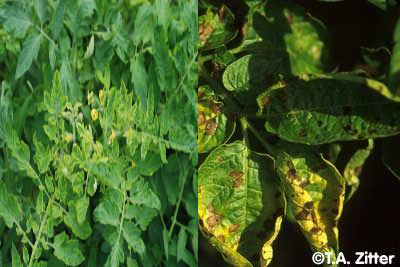

In [ ]:
##This cell is not showing boxes verify this once###
model = checkpoint_and_model["model"]

img_size = checkpoint_and_model["img_size"]
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])



img ='/content/drive/MyDrive/Dataset/Test_Images/tomatoMultiple_Yellow&septora.jpeg'

pred_dict  = model_type.end2end_detect(img, valid_tfms, model, class_map=class_map, detection_threshold=0.5)
pred_dict['img']

  0%|          | 0/1 [00:00<?, ?it/s]

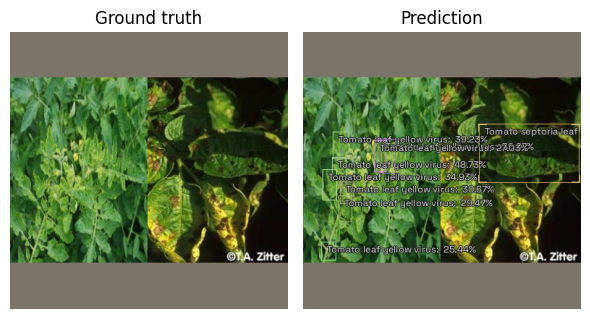

In [ ]:
##This Cell giving correct###

imgs_array = [PIL.Image.open(Path('/content/drive/MyDrive/Dataset/Test_Images/tomatoMultiple_Yellow&septora.jpeg'))]
infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map=class_map)


infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)

show_preds(preds=preds[0:5])